PROBLEM 1

a={1,1,0,1,1,0,1,1}
b={0,1,1,1,1,1,1,0}
c={1,0,1,1,0,1,1,1}

(a intersect b)=4
(b intersect c)=4
(c intersect a)=4

(a union b)=8
(b union c)=8
(a union c)=8


JI is Jaccard Index

JI(a,b)=0.5
JI(b,c)=0.5
JI(a,c)=0.5

JD Jaccard Distance

JD(a,b)=0.5
JD(b,c)=0.5
JD(c,a)=0.5

Cosine Distance

CD(a,b)=4/6 = 2/3
CD(b,c) = 4/6=2/3
CD(a,c)=4/6=2/3



Treat ratings of 3, 4, and 5 as 1 and 1, 2, and blank as 0. Compute the Jaccard distance between each pair of users.

a={1,1,0,1,0,0,1,0}
b={0,1,1,1,0,0,0,0}
c={0,0,0,1,0,1,1,1}

(a intersect b)=2
(b intersect c)=1
(c intersect a)=2

(a union b)=5
(b union c)=6
(a union c)=6


JI is Jaccard Index

JI(a,b)=0.4
JI(b,c)=0.167
JI(a,c)=0.667

JD Jaccard Distance

JD(a,b)=0.6
JD(b,c)=0.833
JD(c,a)=0.333


Normalizing matrix

{ 0.5 0.5 -0.5 0.5 -0.5 -0.5 0.5 -0.5
-0.375 0.625 .625 0.625 -0.375 -0.375 -0.375 
-0.5 -0.5 -0.5 0.5 -0.5 0.5 0.5 0.5 }


Cosine Distance

CD(a,b)=0.1725
CD(b,c)= −0.2581
CD(a,c)= 0.1336

PROBLEM 2

Load the Movielens 100k dataset (ml-100k.zip) into Python using Pandas dataframes. Build a user profile on unscaled data for both users 200 and 15, and calculate the cosine similarity and distance between the user’s preferences and the item/movie 95. Which user would a recommender system suggest this movie to? dataset: https://grouplens.org/datasets/movielens/100k/

In [1]:
import pandas as pd


In [2]:
user_ratings_lab = ["user_id", "item_id", "rating", "timestamp"]
user_ratings = pd.read_csv('ml/u.data', sep='\t', header = None, names = user_ratings_lab,encoding='latin-1')
movie_lab = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('ml/u.item', sep = '|', header = None, names = movie_lab,encoding='latin-1')
user_lab = ["user_id", "age", "gender", "occupation", "zipcode"]
users = pd.read_csv('ml/u.user', sep = '|', header = None, names = user_lab,encoding='latin-1')


In [3]:
user_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1682 non-null int64
movie title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [5]:
def profile_user():
    rec = 0
    genres = movie_lab[6:]
    genre_ratings=[]
    genre_counts=[]
    user_ids = [200, 15]
    profile= user_ids
    lis=[]

    for i in user_ids:
        profile = [i]
        genre_ratings = [0]*len(genres)
        genre_counts = [0]*len(genres)
        per_user_rating=user_ratings[user_ratings['user_id']==i]
        movie_ids = per_user_rating['item_id']
        movie_ratings = per_user_rating['rating']
        for i, r in zip(movie_ids, movie_ratings):
            movie = movies[movies['movie id']==i]
            for k, j in enumerate(genres):
                if movie[j].iloc[0] == 1:
                    genre_ratings[k] += r
                    genre_counts[k] += 1
        rec += 1
        genre_ratings = [round(i/j, 2) if j != 0 else 0 for i,j in zip(genre_ratings, genre_counts)]
        profile.extend(genre_ratings)
        lis.append(profile)
        
    return  lis
        


In [6]:

columns =['User_id','Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 

In [7]:
p=profile_user()

p=pd.DataFrame(p)
p.columns=columns
print(p)

   User_id  Action  Adventure  Animation  Children's  Comedy  Crime  \
0      200    4.20       4.12       4.12        3.95    3.71    3.7   
1       15    2.68       3.00       1.00        1.86    2.68    2.5   

   Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  \
0          2.0   4.11     4.10        5.0     4.4     4.24     3.75     4.11   
1          0.0   3.19     3.33        3.0     1.0     2.00     2.43     3.44   

   Sci-Fi  Thriller   War  Western  
0    4.37      4.02  4.29      4.0  
1    2.67      2.36  3.40      0.0  


In [8]:
from scipy.spatial.distance import cosine


In [9]:
#calculate the cosine similarity and distance between the user’s preferences and the item/movie 95

In [10]:
genres=movie_lab[6:]
user200=cosine(movies[movies['movie id']==95][genres].values[0], p[genres].values[0])

In [11]:
print("cosine similarity between user 200 and movie 97 :",user200)

cosine similarity between user 200 and movie 97 : 0.5338775894666912


In [12]:
user15=cosine(movies[movies['movie id']==95][genres].values[0], p[genres].values[1])
print("cosine similarity between user 15 and movie 97 :",user15)

cosine similarity between user 15 and movie 97 : 0.6427084353986308


Recommend movie 97 to user 15

In [13]:
###############################################################

QUESTION 3

To predict which age group the user who likes "Speed" will belong to and to suggest a list of some other movies he might like

In [14]:

data=user_ratings
data.head(4)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923


In [15]:
import numpy as np

In [16]:
#Create a pivot table for data with ratings as values for every user-movie pair
data_pivot = pd.pivot_table(data,values='rating',index='item_id',columns='user_id')
data_pivot.fillna( 0, inplace = True )

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

a_1 = np.array(data_pivot.iloc[567]).reshape(1, -1)  #567 is the row number of movie 'Speed'

 
# calculate the similartity of this movie with the others in the list
score_col = cosine_similarity(data_pivot, a_1).reshape(-1)


# form a data frame of similar movies 
dictdf = {'collaborative': score_col } 
similar = pd.DataFrame(dictdf, index = data_pivot.index )
 
#sort it on the basis of collaborative score
similar.sort_values('collaborative', ascending=False, inplace=True)
similar[['collaborative']][1:].head(10)


,collaborative
item_id,
82,0.721395
385,0.719504
161,0.707567
79,0.696583
96,0.695556
195,0.676778
174,0.676664
210,0.674811
550,0.674143


IDENTIFYING AGE GROUP TO WHICH THE USERS WHO LIKE 'SPEED' BELONG TO

In [18]:
data_tmp=pd.merge(users,user_ratings,on='user_id')

data_piv = pd.pivot_table(data_tmp,values='rating',index='user_id',columns='item_id')

In [19]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data_tmp['agerange'] = pd.cut(data_tmp.age, bins, labels = labels,include_lowest = True)

data_summary=data_tmp.groupby('agerange',as_index=True)['rating'].count()
data_tmp.head(4)

,user_id,age,gender,occupation,zipcode,item_id,rating,timestamp,agerange
0,1,24,M,technician,85711,61,4,878542420,18-29
1,1,24,M,technician,85711,189,3,888732928,18-29
2,1,24,M,technician,85711,33,4,878542699,18-29
3,1,24,M,technician,85711,160,4,875072547,18-29


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba3c47e048>,
      dtype=object)

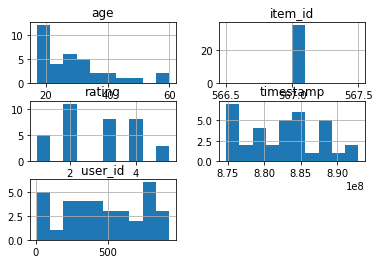

In [21]:
data_tmp[data_tmp['item_id']==567].hist()


FROM PLOT ABOVE, USERS WHO LIKE 'SPEED' BELONG TO AGE GROUP 18-29